In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('data/card-transactions.csv')

data.head()

,Date,Transaction Type,Transaction Status,Original Currency,Original Amount,Currency,Amount,Merchant Name,Last4,Card Name,Decline Reason
0,2023-12-15 10:21:58 +01:00,POS_TX,APPROVED,USD,48.75,USD,48.75,KODEKLOUD,3038,Enugbeh mo need owo,NaN
1,2023-12-15 10:19:41 +01:00,DEPOSIT,APPROVED,USD,50.00,USD,50.00,Deel Balance,NaN,NaN,NaN
2,2023-12-10 00:25:16 +01:00,POS_TX,APPROVED,USD,28.00,USD,28.00,PAYPAL *HEROSHE,3038,Enugbeh mo need owo,NaN
3,2023-12-10 00:25:03 +01:00,DEPOSIT,APPROVED,USD,20.00,USD,20.00,Deel Balance,NaN,NaN,NaN
4,2023-12-10 00:23:43 +01:00,POS_TX,DECLINED,USD,28.00,USD,0,PAYPAL *HEROSHE,3038,Enugbeh mo need owo,insufficient funds


In [5]:
data.columns

Index(['Date', 'Transaction Type', 'Transaction Status', 'Original Currency',
       'Original Amount', 'Currency', 'Amount', 'Merchant Name', 'Last4',
       'Card Name', 'Decline Reason'],
      dtype='object')

In [6]:
data.index

RangeIndex(start=0, stop=246, step=1)

In [7]:
print(data['Amount'])

0      48.75
1      50.00
2      28.00
3      20.00
4          0
       ...  
241     4.30
242        0
243        0
244     5.00
245    30.00
Name: Amount, Length: 246, dtype: object


In [8]:
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

In [9]:
average_amount = round(data['Amount'].mean(), 2)

print('Average amount:', average_amount)

Average amount: 48.43


In [10]:
total_amount_spent = round(np.sum(data['Amount']), 2)

print('Total amount:', total_amount_spent)

Total amount: 11671.42


### Top 15 Marchants

In [11]:

data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

# Filter for transactions that are not 'DEPOSIT'
merchant_data = data[(data['Transaction Type'] != 'DEPOSIT') & (data['Transaction Status'] == 'APPROVED')]

# Group by 'Merchant Name' and sum the 'Amount'
merchant_totals = merchant_data.groupby('Merchant Name')['Amount'].sum()

# Sort the merchants based on total amount spent
sorted_merchants = merchant_totals.sort_values(ascending=False)

# Get the top 15 merchants
top_15_merchants = sorted_merchants.head(15)

# Print the result
print('Top 15 Merchants (excluding DEPOSIT transactions):')
print(top_15_merchants)


Top 15 Merchants (excluding DEPOSIT transactions):
Merchant Name
KLM                       783.85
AIRBNB * HMJW3T3CR3       671.98
AIRBNB * HMZW3RT3EP       606.65
EVENT* THE LINUX FOUND    450.00
AIRBNB * HM5WZS22MW       362.89
APPLE STORE  #R035        353.85
PAYPAL *ME                334.20
United Airlines - Sing    289.30
AMAZON.COM AMZN.COM/BI    270.29
AMAZON.COM.PAYMENTS       239.15
Deel Balance              231.82
UBER   * PENDING          187.01
FOREVER21 1904            174.14
AMZN Mktp US              141.54
UNITED                    135.00
Name: Amount, dtype: float64


### For deposit

In [12]:

data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')


deposit_merchant_data = data[(data['Transaction Type'] == 'DEPOSIT') & (data['Transaction Status'] == 'APPROVED')]

# Print the data
print('Deposit data:')
print(deposit_merchant_data.head())


Deposit data:
                          Date Transaction Type Transaction Status  \
1   2023-12-15 10:19:41 +01:00          DEPOSIT           APPROVED   
3   2023-12-10 00:25:03 +01:00          DEPOSIT           APPROVED   
6   2023-12-08 23:44:26 +01:00          DEPOSIT           APPROVED   
12  2023-12-01 17:27:17 +01:00          DEPOSIT           APPROVED   
14  2023-12-01 11:12:01 +01:00          DEPOSIT           APPROVED   

   Original Currency Original Amount Currency  Amount Merchant Name Last4  \
1                USD           50.00      USD    50.0  Deel Balance   NaN   
3                USD           20.00      USD    20.0  Deel Balance   NaN   
6                USD           30.00      USD    30.0  Deel Balance   NaN   
12               USD           20.00      USD    20.0  Deel Balance   NaN   
14               USD           10.00      USD    10.0  Deel Balance   NaN   

   Card Name Decline Reason  
1        NaN            NaN  
3        NaN            NaN  
6        NaN

In [13]:
total_deposits = np.sum(deposit_merchant_data.Amount)

print('Total deposits:', total_deposits)

Total deposits: 4475.0


### Top Marchants based on Succesful transactions

In [14]:
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
data['Date'] = pd.to_datetime(data['Date'])

# Filter for transactions that are not DEPOSIT and have APPROVED status
marchant_data = data[(data['Transaction Type'] != 'DEPOSIT') & (data['Transaction Status'] == 'APPROVED')].copy()
marchant_data['Month'] = marchant_data['Date'].dt.month

# Create an empty list to store top merchants for each month
top_merchants_by_month = []

# Iterate through each month
for month in range(1, 13):
    # Filter data for the current month
    monthly_data = marchant_data[marchant_data['Month'] == month]

    # Group by MERCHANT NAME and sum the AMOUNT
    merchant_totals = monthly_data.groupby('Merchant Name')['Amount'].sum()

    # Sort the MERCHANTS based on total amount spent
    sorted_merchants = merchant_totals.sort_values(ascending=False)

    # Get the top merchants for the current month
    top_merchant = sorted_merchants.head(1)

    # Append the result to the list
    top_merchants_by_month.append(top_merchant.reset_index())

# Create a final DataFrame from the list of DataFrames
top_merchants_by_month_df = pd.concat(top_merchants_by_month, ignore_index=True)

# Print the result
print('Top Merchants for Each Month:')
print(top_merchants_by_month_df)

Top Merchants for Each Month:
            Merchant Name  Amount
0  DNH*GODADDY.COM EUROPE   22.06
1     AIRBNB * HMJW3T3CR3  671.98
2      WL *STEAM PURCHASE   74.56
3  EVENT* THE LINUX FOUND  200.00
4     AMAZON.COM.PAYMENTS  239.15
5                     KLM  783.85
6     AIRBNB * HMZW3RT3EP  606.65
7               KODEKLOUD   48.75


### Failed Transactions

In [15]:
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

faild_transactions = data[data['Transaction Status'] == 'DECLINED']

print('Failed transaction:')
print(faild_transactions[['Date', 'Transaction Type', 'Transaction Status', 'Original Currency', 'Original Amount', 'Currency', 'Amount', 'Merchant Name', 'Decline Reason']])


Failed transaction:
                         Date Transaction Type Transaction Status  \
4   2023-12-10 00:23:43+01:00           POS_TX           DECLINED   
7   2023-12-05 20:38:07+01:00           POS_TX           DECLINED   
8   2023-12-05 20:38:06+01:00           POS_TX           DECLINED   
10  2023-12-03 12:42:59+01:00           POS_TX           DECLINED   
13  2023-12-01 12:42:40+01:00           POS_TX           DECLINED   
15  2023-12-01 11:04:48+01:00           POS_TX           DECLINED   
20  2023-11-28 12:42:52+01:00           POS_TX           DECLINED   
31  2023-11-25 23:05:17+01:00           POS_TX           DECLINED   
32  2023-11-25 23:05:16+01:00           POS_TX           DECLINED   
33  2023-11-25 12:42:56+01:00           POS_TX           DECLINED   
41  2023-11-22 12:42:35+01:00           POS_TX           DECLINED   
42  2023-11-21 17:36:46+01:00           POS_TX           DECLINED   
43  2023-11-21 17:36:46+01:00           POS_TX           DECLINED   
44  2023-11-19

In [16]:
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

failed_transactions = data[data['Transaction Status'] == 'DECLINED']

total_failed_transactions = round(faild_transactions['Amount'].sum(), 2)

print('Sum of failed transactions:', total_failed_transactions)

Sum of failed transactions: 0.0


### Refunds

In [17]:
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

refunds = data[data['Transaction Type'] == 'REFUND']

print('Refunds:')
print(refunds[['Date', 'Transaction Type', 'Transaction Status', 'Original Currency', 'Original Amount', 'Currency', 'Amount', 'Merchant Name', 'Decline Reason']])


Refunds:
                         Date Transaction Type Transaction Status  \
18  2023-11-29 19:20:11+01:00           REFUND           APPROVED   
21  2023-11-27 00:01:03+01:00           REFUND           APPROVED   
23  2023-11-26 18:58:03+01:00           REFUND           APPROVED   
25  2023-11-26 18:52:27+01:00           REFUND           APPROVED   
27  2023-11-26 00:03:54+01:00           REFUND           APPROVED   
34  2023-11-25 00:09:23+01:00           REFUND           APPROVED   
40  2023-11-24 00:09:42+01:00           REFUND           APPROVED   
56  2023-11-16 16:58:14+01:00           REFUND           APPROVED   
65  2023-11-16 04:02:21+01:00           REFUND           APPROVED   
81  2023-11-15 00:20:34+01:00           REFUND           APPROVED   
84  2023-11-14 00:13:13+01:00           REFUND           APPROVED   
94  2023-11-12 20:57:19+01:00           REFUND           APPROVED   
96  2023-11-12 20:51:43+01:00           REFUND           APPROVED   
100 2023-11-12 20:12:05+0

In [18]:
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

refunds = data[data['Transaction Type'] == 'REFUND']


total_refunds= round(refunds['Amount'].sum(), 2)

print('Sum of total refunds:', total_refunds)

Sum of total refunds: 358.52


### Total Successful transactions

In [19]:
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

successful_transactions = data[data['Transaction Status'] == 'APPROVED']

total_successful_transactions = round(successful_transactions['Amount'].sum(), 2)

print('Sum of succesful transactions:', total_successful_transactions)

Sum of succesful transactions: 11671.42


In [20]:
import calendar

data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
data['Date'] = pd.to_datetime(data['Date'])

# Filter for successful transactions
successful_transactions = data[(data['Transaction Status'] == 'APPROVED') & (data['Transaction Type'] != 'DEPOSIT')]

# Create a new column for the month
successful_transactions = successful_transactions.copy()
successful_transactions['Month'] = successful_transactions['Date'].dt.month.astype(int)
successful_transactions['Year'] = successful_transactions['Date'].dt.year.astype(int)

# Calculate total successful transactions by month and year
total_successful_transactions_by_month_year = (
    successful_transactions
    .groupby(['Year', 'Month'])
    .agg({'Amount': 'sum'})
    .reset_index()
)

# Print the results
print('Total Successful Transactions by Month and Year:')
for index, row in total_successful_transactions_by_month_year.iterrows():
    year = int(row['Year'])
    month = int(row['Month'])
    month_name = pd.Timestamp(year, month, 1).strftime('%B %Y')
    print(f"{month_name}: {round(row['Amount'], 2)}")


Total Successful Transactions by Month and Year:
May 2023: 64.29
June 2023: 750.71
July 2023: 203.45
August 2023: 294.59
September 2023: 398.93
October 2023: 1581.04
November 2023: 3777.01
December 2023: 126.4


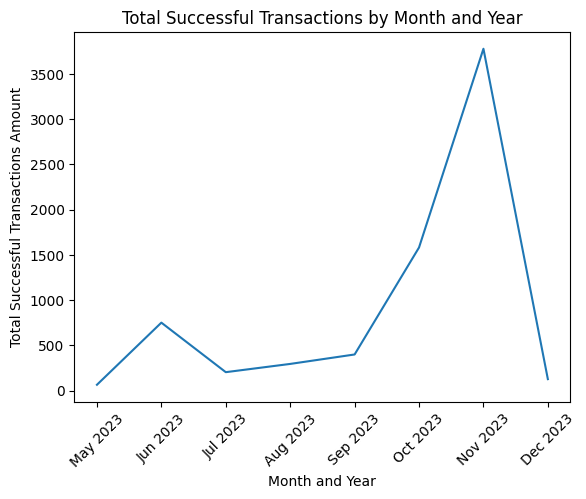

In [21]:
import matplotlib.pyplot as plt

# Assuming 'Month' and 'Year' are the columns you want to plot
plt.plot(total_successful_transactions_by_month_year['Amount'])

# Customize the x-axis ticks and labels
months = total_successful_transactions_by_month_year['Month']
years = total_successful_transactions_by_month_year['Year']
month_labels = [calendar.month_abbr[m] for m in months]  # Using abbreviated month names
year_labels = [str(year) for year in years]

plt.xticks(range(len(total_successful_transactions_by_month_year)), labels=[f"{month} {year}" for month, year in zip(month_labels, year_labels)], rotation=45)

# Label the axes
plt.xlabel('Month and Year')
plt.ylabel('Total Successful Transactions Amount')

# Add a title
plt.title('Total Successful Transactions by Month and Year')

# Show the plot
plt.show()


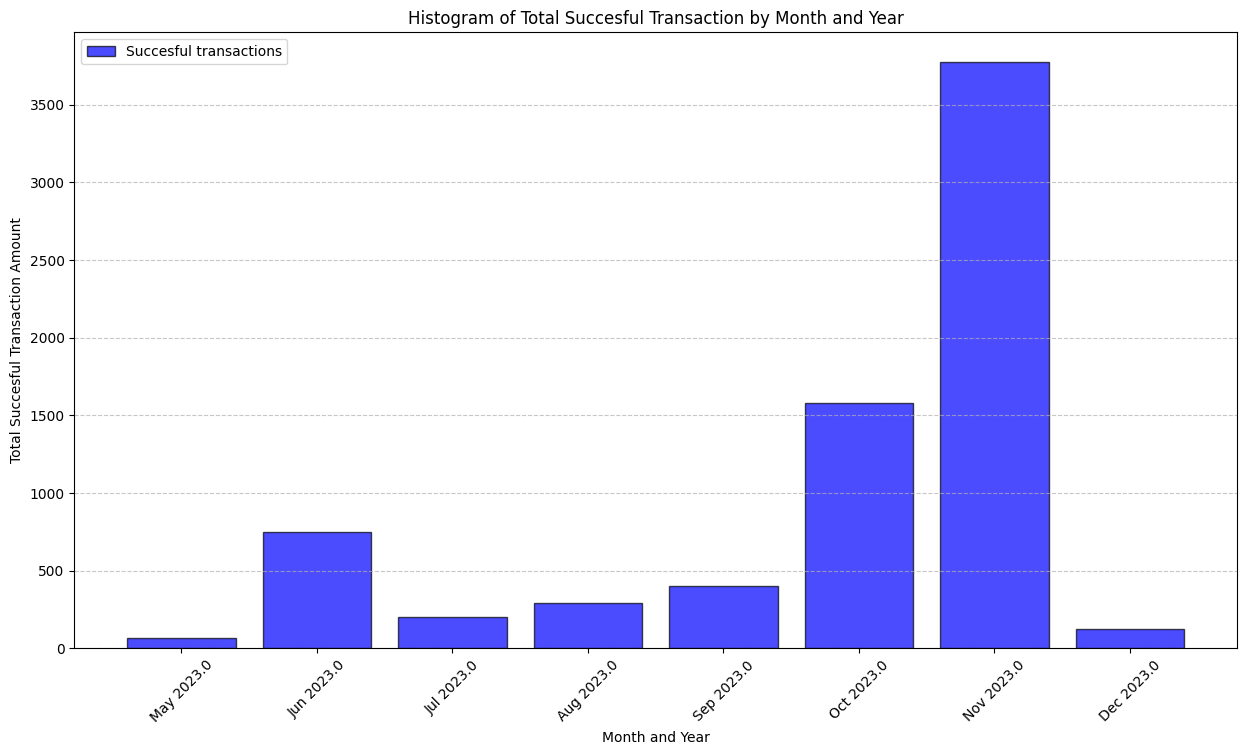

In [22]:
# Assuming 'Month' and 'Year' are the columns you want to plot for card expenses
total_successful_transactions_by_month_year['Month'] = total_successful_transactions_by_month_year['Month'].astype(int)
months_card = total_successful_transactions_by_month_year['Month']
years_card = total_successful_transactions_by_month_year['Year']

# Combine 'Year' and 'Month' to create a new column 'Period' for better representation
total_successful_transactions_by_month_year['Period'] = total_successful_transactions_by_month_year.apply(lambda row: f"{calendar.month_abbr[int(row['Month'])]} {row['Year']}", axis=1)

# Plot total card expenses as a histogram with amount on the y-axis
plt.figure(figsize=(15, 8))
plt.bar(range(len(total_successful_transactions_by_month_year)), total_successful_transactions_by_month_year['Amount'], color='blue', alpha=0.7, edgecolor='black', label='Succesful transactions')

# Customize the x-axis ticks and labels for card expenses
plt.xticks(range(len(total_successful_transactions_by_month_year)), total_successful_transactions_by_month_year['Period'], rotation=45)
plt.xlabel('Month and Year')
plt.ylabel('Total Succesful Transaction Amount')
plt.title('Histogram of Total Succesful Transaction by Month and Year')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the legend
plt.legend()

# Show the plot
plt.show()


### Card expenses

In [23]:
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

card_expenses = data[data['Transaction Type'] == 'POS_TX']

print('Card Expenses:')
print(card_expenses[['Date', 'Transaction Type', 'Transaction Status', 'Original Currency', 'Original Amount', 'Currency', 'Amount', 'Merchant Name', 'Decline Reason']])


Card Expenses:
                         Date Transaction Type Transaction Status  \
0   2023-12-15 10:21:58+01:00           POS_TX           APPROVED   
2   2023-12-10 00:25:16+01:00           POS_TX           APPROVED   
4   2023-12-10 00:23:43+01:00           POS_TX           DECLINED   
5   2023-12-08 23:45:48+01:00           POS_TX           APPROVED   
7   2023-12-05 20:38:07+01:00           POS_TX           DECLINED   
..                        ...              ...                ...   
239 2023-05-04 21:33:23+01:00           POS_TX           APPROVED   
240 2023-05-04 21:32:59+01:00           POS_TX           APPROVED   
241 2023-05-04 21:32:06+01:00           POS_TX           APPROVED   
242 2023-05-04 19:59:14+01:00           POS_TX           DECLINED   
243 2023-05-04 19:59:14+01:00           POS_TX           DECLINED   

    Original Currency Original Amount Currency  Amount        Merchant Name  \
0                 USD           48.75      USD   48.75            KODEKLOUD  

In [24]:
# Total card expsnses

data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

# Filter for successful transactions
card_expenses = data[(data['Transaction Status'] == 'APPROVED') & (data['Transaction Type'] == 'POS_TX')]


total_card_expenses = round(card_expenses['Amount'].sum(), 2)

print('Sum of card expenses:', total_card_expenses)

Sum of card expenses: 6541.08


In [25]:
# Total card expsnses

data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

# Filter for successful transactions
card_expenses = data[(data['Transaction Status'] == 'APPROVED') & (data['Transaction Type'] == 'POS_TX')]

# Create a new column for the month and year
card_expenses = card_expenses.copy()
card_expenses['Month'] = card_expenses['Date'].dt.month.astype(int)
card_expenses['Year'] = card_expenses['Date'].dt.year.astype(int)


# Calculate total successful transactions by month and year
total_card_expenses_by_month_year = (
    card_expenses
    .groupby(['Year', 'Month'])
    .agg({'Amount': 'sum'})
    .reset_index()
)

# Print the results
print('Total card expensis by Month and Year:')
for index, row in total_card_expenses_by_month_year.iterrows():
    year = int(row['Year'])
    month = int(row['Month'])
    month_name = pd.Timestamp(year, month, 1).strftime('%B %Y')
    print(f"{month_name}: {round(row['Amount'], 2)}")


Total card expensis by Month and Year:
May 2023: 59.29
June 2023: 748.89
July 2023: 107.18
August 2023: 294.59
September 2023: 348.93
October 2023: 1401.04
November 2023: 3454.76
December 2023: 126.4


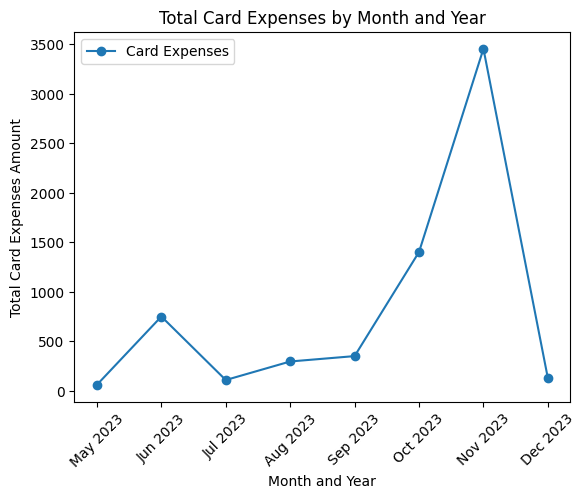

In [26]:
# Assuming 'Month' and 'Year' are the columns you want to plot for card expenses
months_card = total_card_expenses_by_month_year['Month']
years_card = total_card_expenses_by_month_year['Year']

# Plot total card expenses
plt.plot(total_card_expenses_by_month_year['Amount'], label='Card Expenses', marker='o')

# Customize the x-axis ticks and labels for card expenses
plt.xticks(range(len(total_card_expenses_by_month_year)),
           labels=[f"{calendar.month_abbr[month]} {year}" for month, year in zip(months_card, years_card)],
           rotation=45)

# Label the axes for card expenses
plt.xlabel('Month and Year')
plt.ylabel('Total Card Expenses Amount')

# Add a title for card expenses
plt.title('Total Card Expenses by Month and Year')

# Show the legend for card expenses
plt.legend()

# Show the plot for card expenses
plt.show()


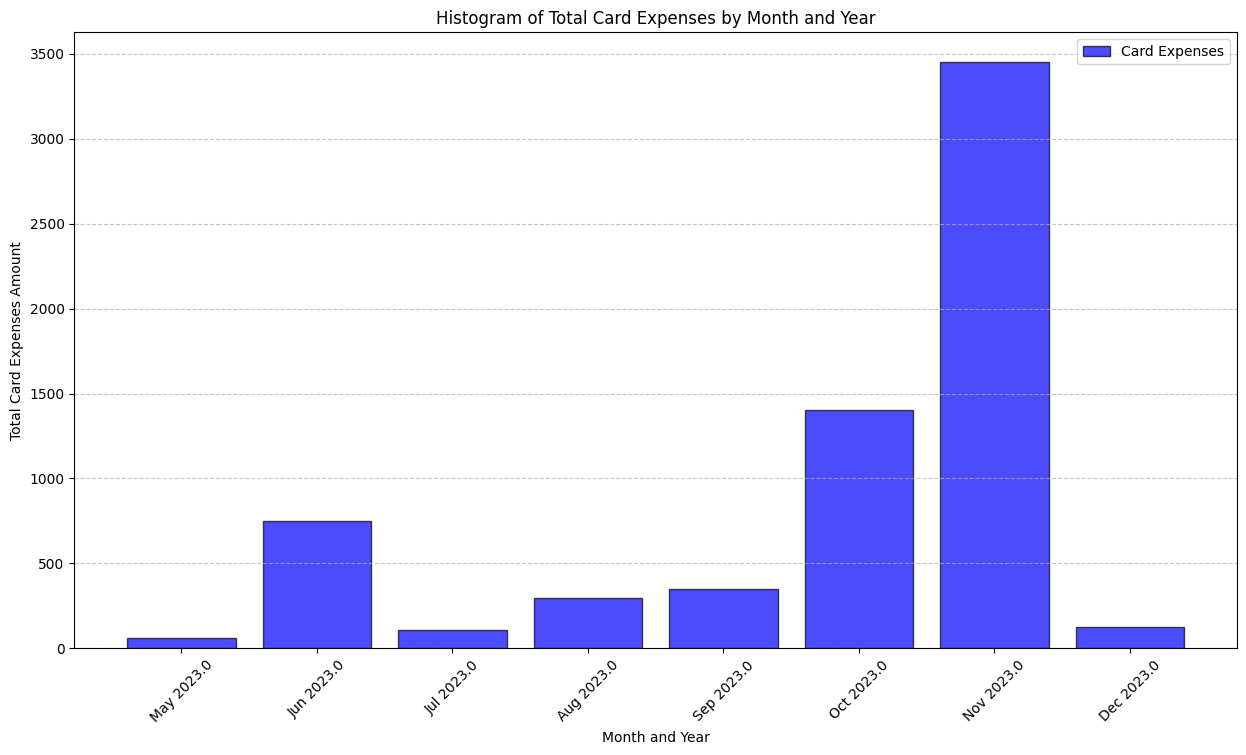

In [27]:
# Assuming 'Month' and 'Year' are the columns you want to plot for card expenses
total_card_expenses_by_month_year['Month'] = total_card_expenses_by_month_year['Month'].astype(int)
months_card = total_card_expenses_by_month_year['Month']
years_card = total_card_expenses_by_month_year['Year']

# Combine 'Year' and 'Month' to create a new column 'Period' for better representation
total_card_expenses_by_month_year['Period'] = total_card_expenses_by_month_year.apply(lambda row: f"{calendar.month_abbr[int(row['Month'])]} {row['Year']}", axis=1)

# Plot total card expenses as a histogram with amount on the y-axis
plt.figure(figsize=(15, 8))
plt.bar(range(len(total_card_expenses_by_month_year)), total_card_expenses_by_month_year['Amount'], color='blue', alpha=0.7, edgecolor='black', label='Card Expenses')

# Customize the x-axis ticks and labels for card expenses
plt.xticks(range(len(total_card_expenses_by_month_year)), total_card_expenses_by_month_year['Period'], rotation=45)
plt.xlabel('Month and Year')
plt.ylabel('Total Card Expenses Amount')
plt.title('Histogram of Total Card Expenses by Month and Year')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the legend
plt.legend()

# Show the plot
plt.show()


### A histogram displaying both total succesful transaction's and card expenses

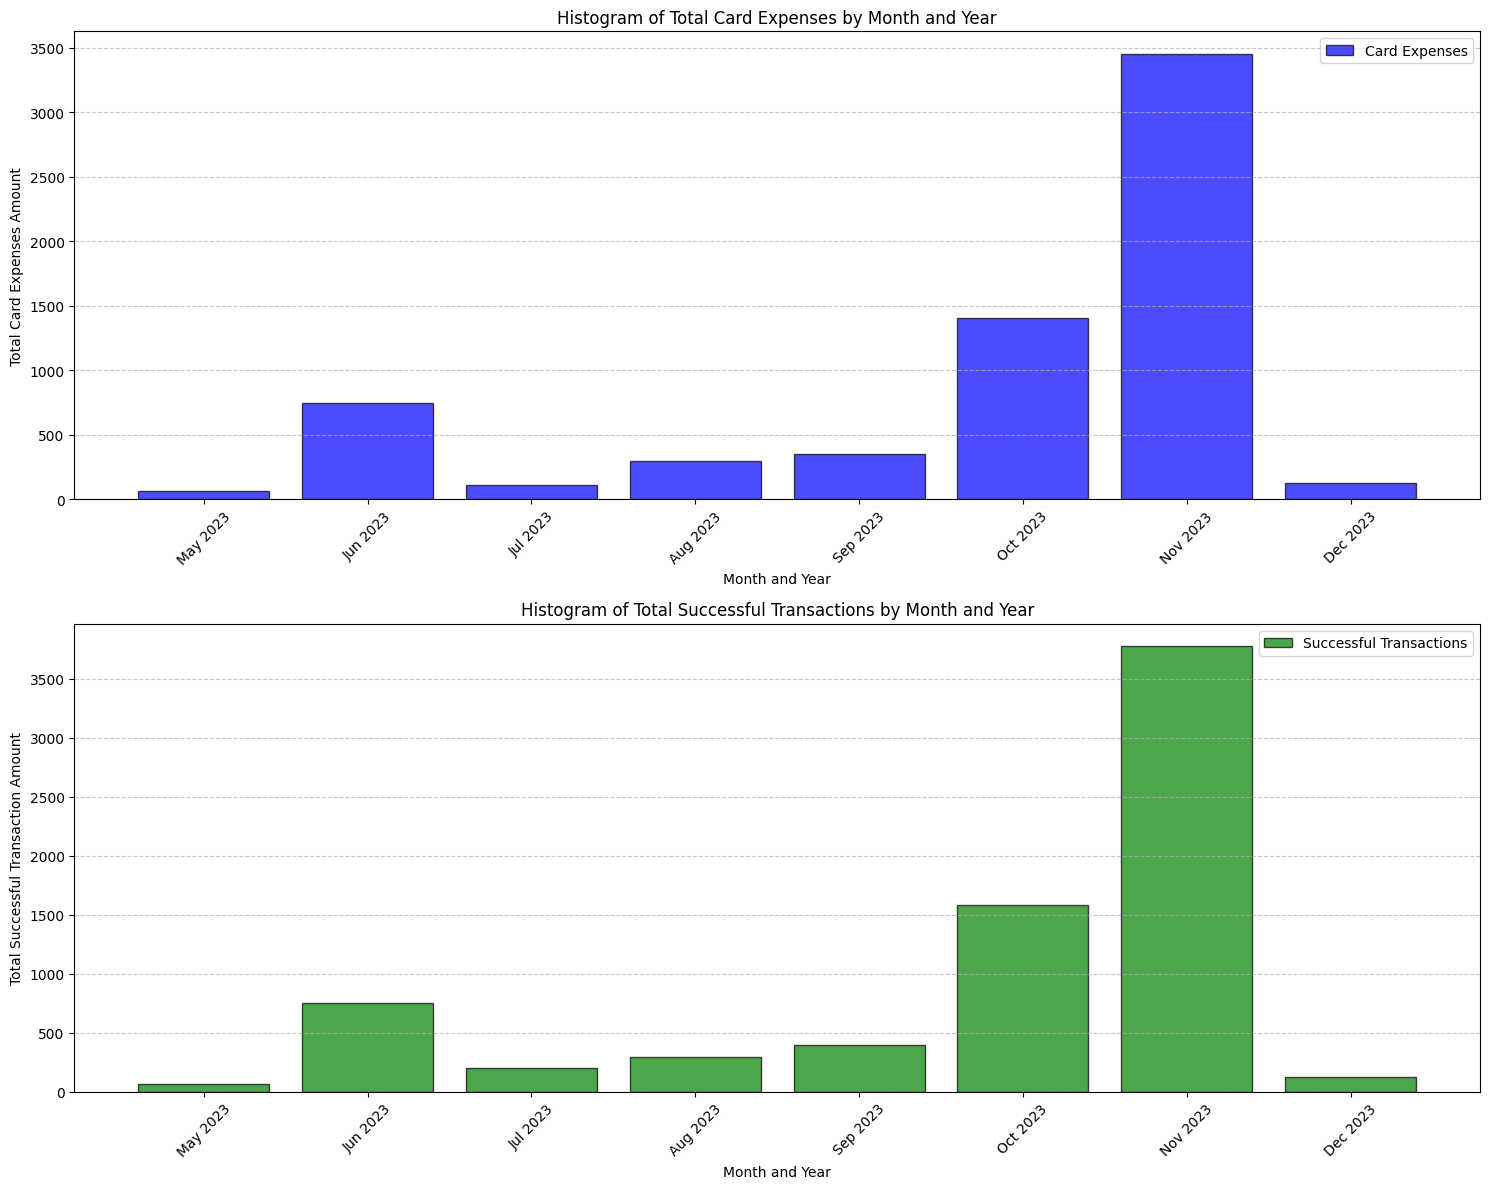

In [28]:
import matplotlib.pyplot as plt
import calendar

# Assuming 'Month' and 'Year' are the columns you want to plot for card expenses
total_card_expenses_by_month_year['Month'] = total_card_expenses_by_month_year['Month'].astype(int)
months_card = total_card_expenses_by_month_year['Month']
years_card = total_card_expenses_by_month_year['Year']

# Combine 'Year' and 'Month' to create a new column 'Period' for better representation
total_card_expenses_by_month_year['Period'] = total_card_expenses_by_month_year.apply(lambda row: f"{calendar.month_abbr[int(row['Month'])]} {row['Year']}", axis=1)

# Assuming 'Month' and 'Year' are the columns you want to plot for successful transactions
total_successful_transactions_by_month_year['Month'] = total_successful_transactions_by_month_year['Month'].astype(int)
months_successful = total_successful_transactions_by_month_year['Month']
years_successful = total_successful_transactions_by_month_year['Year']

# Combine 'Year' and 'Month' to create a new column 'Period' for better representation
total_successful_transactions_by_month_year['Period'] = total_successful_transactions_by_month_year.apply(lambda row: f"{calendar.month_abbr[int(row['Month'])]} {row['Year']}", axis=1)

# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot total card expenses as a histogram with amount on the y-axis
axes[0].bar(range(len(total_card_expenses_by_month_year)), total_card_expenses_by_month_year['Amount'], color='blue', alpha=0.7, edgecolor='black', label='Card Expenses')
axes[0].set_xticks(range(len(total_card_expenses_by_month_year)))
axes[0].set_xticklabels(total_card_expenses_by_month_year['Period'], rotation=45)
axes[0].set_xlabel('Month and Year')
axes[0].set_ylabel('Total Card Expenses Amount')
axes[0].set_title('Histogram of Total Card Expenses by Month and Year')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend()

# Plot total successful transactions as a histogram with amount on the y-axis
axes[1].bar(range(len(total_successful_transactions_by_month_year)), total_successful_transactions_by_month_year['Amount'], color='green', alpha=0.7, edgecolor='black', label='Successful Transactions')
axes[1].set_xticks(range(len(total_successful_transactions_by_month_year)))
axes[1].set_xticklabels(total_successful_transactions_by_month_year['Period'], rotation=45)
axes[1].set_xlabel('Month and Year')
axes[1].set_ylabel('Total Successful Transaction Amount')
axes[1].set_title('Histogram of Total Successful Transactions by Month and Year')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


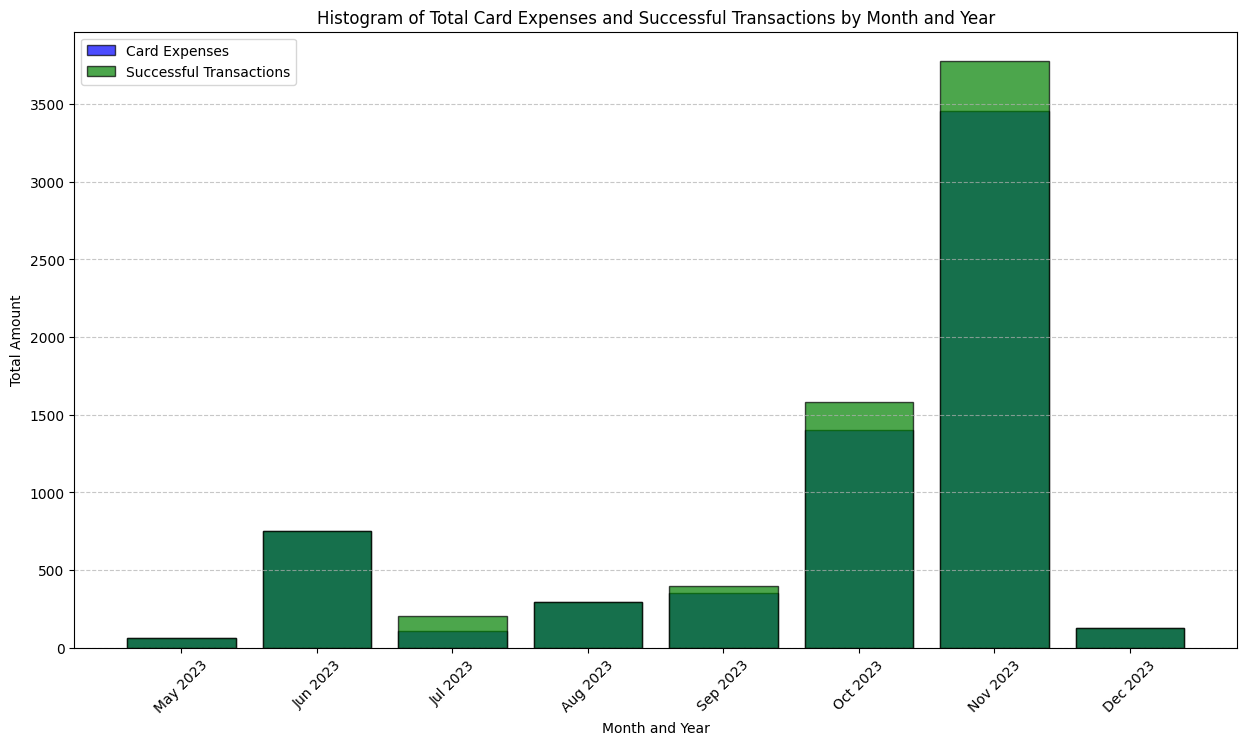

In [29]:
import matplotlib.pyplot as plt
import calendar

# Assuming 'Month' and 'Year' are the columns you want to plot for card expenses
total_card_expenses_by_month_year['Month'] = total_card_expenses_by_month_year['Month'].astype(int)
months_card = total_card_expenses_by_month_year['Month']
years_card = total_card_expenses_by_month_year['Year']

# Combine 'Year' and 'Month' to create a new column 'Period' for better representation
total_card_expenses_by_month_year['Period'] = total_card_expenses_by_month_year.apply(lambda row: f"{calendar.month_abbr[int(row['Month'])]} {row['Year']}", axis=1)

# Assuming 'Month' and 'Year' are the columns you want to plot for successful transactions
total_successful_transactions_by_month_year['Month'] = total_successful_transactions_by_month_year['Month'].astype(int)
months_successful = total_successful_transactions_by_month_year['Month']
years_successful = total_successful_transactions_by_month_year['Year']

# Combine 'Year' and 'Month' to create a new column 'Period' for better representation
total_successful_transactions_by_month_year['Period'] = total_successful_transactions_by_month_year.apply(lambda row: f"{calendar.month_abbr[int(row['Month'])]} {row['Year']}", axis=1)

# Plot both histograms on the same set of axes
plt.figure(figsize=(15, 8))

# Plot total card expenses as a histogram with amount on the y-axis
plt.bar(range(len(total_card_expenses_by_month_year)), total_card_expenses_by_month_year['Amount'], color='blue', alpha=0.7, edgecolor='black', label='Card Expenses')

# Plot total successful transactions as a histogram with amount on the y-axis
plt.bar(range(len(total_successful_transactions_by_month_year)), total_successful_transactions_by_month_year['Amount'], color='green', alpha=0.7, edgecolor='black', label='Successful Transactions')

# Customize the x-axis ticks and labels
plt.xticks(range(len(total_card_expenses_by_month_year)), total_card_expenses_by_month_year['Period'], rotation=45)
plt.xlabel('Month and Year')
plt.ylabel('Total Amount')
plt.title('Histogram of Total Card Expenses and Successful Transactions by Month and Year')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the legend
plt.legend()

# Show the plot
plt.show()
